_Author: Peter Sadowski_

# Deep Learning Quick Start: MNIST in Keras

This tutorial quickly introduces deep learning in keras with the tensorflow backend. It does not use a GPU.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Tensorflow will grab the memory on all the system gpus unless you tell it not to. 
# Here we tell TF to not use any GPUs.
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['CUDA_VISIBLE_DEVICES'] = "" # (Empty) List of gpu indices that TF can see.
import tensorflow as tf
CONFIG = tf.ConfigProto(device_count = {'GPU': 0}, log_device_placement=False, allow_soft_placement=False) # Use 0 GPUs.
CONFIG.gpu_options.allow_growth = True # Prevents tf from grabbing all gpu memory.
sess = tf.Session(config=CONFIG)
from keras import backend as K
K.set_session(sess)

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.utils import np_utils
from keras.regularizers import l2

Using TensorFlow backend.


## Load data set.

In [2]:
# Load data.
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #import as numpy array
print("Original X shape", X_train.shape) #(make sure in ut-8; float 32 format)
print("Original Y shape", Y_train.shape)

# Reshape data.
X_train = X_train.reshape(60000, 784) # each point is vector of length 784
X_test  = X_test.reshape(10000, 784)
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')
X_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
X_test  /= 255
print("Training X matrix shape", X_train.shape)
print("Testing X matrix shape", X_test.shape)
    
# Represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
nb_classes = 10 # (for 2 classes, better to just have a sigmoidal output) (in tensorflow for the 2 class one, just use the sigmoid function cause the softmax function goes to infinity)
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_test  = np_utils.to_categorical(Y_test, nb_classes)
print("Training Y matrix shape", Y_train.shape)
print("Testing Y matrix shape", Y_test.shape)

11427840/11490434 [============================>.] - ETA: 0sOriginal X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 784)
Training Y matrix shape (60000, 10)
Testing Y matrix shape (10000, 10)


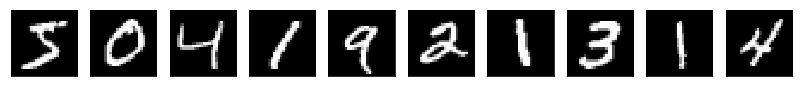

In [3]:
# Plot examples of the data.
plt.figure(1, figsize=(14,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

# Neural Network in Keras


(Source: https://github.com/wxs/keras-mnist-tutorial)
<img src="arch.png" />

In [4]:
# Simple fully-connected neural network with 2 hidden layers.
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001))) # Use input_shape=(28,28) for unflattened data.
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2)) # Including dropout layer helps avoid overfitting.
model.add(Dense(10, activation='softmax')) # Use softmax layer for multi-class problems.

## Compile the Keras model.
Compiling the model **builds** each layer. Keras examines the computation graph and automatically determines the size of the weight tensors at each layer. These weights are then initialized.

The **loss function** is the objective function being optimized, and the *categorical crossentropy* is the appropriate loss function for the *softmax* output. For *logistic* outputs use *binomial crossentropy*, and for linear outputs use *mean_squared_error*. Some notes on the math behind this can be found here: https://www.ics.uci.edu/~pjsadows/notes.pdf.

The **accuracy** is just a metric that we keep track of during training. Keras also allows you to define your own metrics.

The **optimizer** is the algorithm used to update the weights. Typical choices include *sgd*, *rmsprop*, or *adam*. ADAM is a good choice for quick results, but standard SGD is easier to debug. In this tutorial, we use the default hyperparameters for the optimization (e.g. the initial *learning rate*), but these generally need to be tuned for each problem.

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model.
Weights are updated one mini-batch at a time. A running average of the training loss is computed in real time, which is useful for identifying problems (e.g. the loss might explode or get stuck right). The validation loss is evaluated at the end of each epoch (without dropout).

In [6]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1,
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.4336 - acc: 0.9229 - val_loss: 0.2426 - val_acc: 0.9612
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.2035 - acc: 0.9656 - val_loss: 0.1749 - val_acc: 0.9698
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.1576 - acc: 0.9733 - val_loss: 0.1588 - val_acc: 0.9694
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.1384 - acc: 0.9761 - val_loss: 0.1388 - val_acc: 0.9759
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.1277 - acc: 0.9779 - val_loss: 0.1430 - val_acc: 0.9736
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.1208 - acc: 0.9797 - val_loss: 0.1355 - val_acc: 0.9730
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.1133 - acc: 0.9818 - val_loss: 0.1246 - val_acc: 0.9758
Epoch 8/10
60000/60000 [==============================] - 3s 

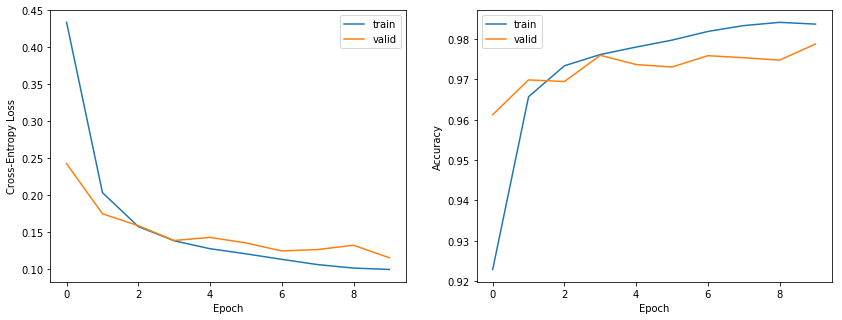

In [7]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Evaluate performance

In [8]:
# Note: when calling evaluate, dropout is automatically turned off.
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.2f' % score[1])

Test cross-entropy loss: 0.11550
Test accuracy: 0.98


### Inspecting the output
This is always a good sanity check.

 8864/10000 [=========================>....] - ETA: 0s

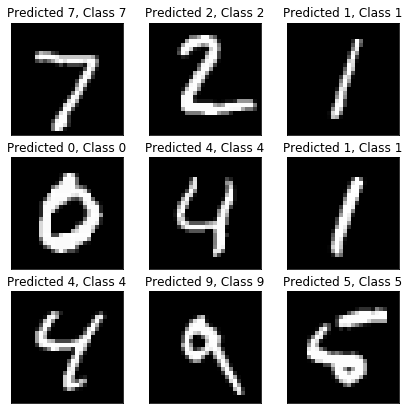

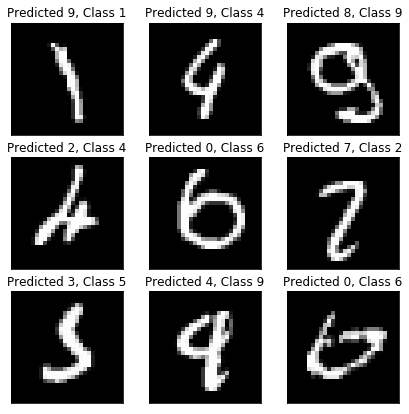

In [9]:
predicted_classes = model.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == Y_test.argmax(axis=-1))[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test.argmax(axis=-1))[0]

plt.figure(1, figsize=(7,7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])
    
plt.figure(2, figsize=(7,7))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])

## Examine the learned features. 
We can interpret the features in the first layer by visualizing the weights.

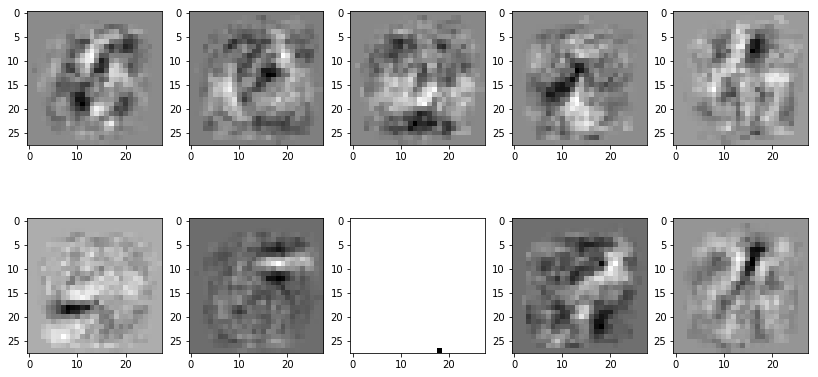

In [11]:
# We can get an
from keras import backend as K # import the keras wrapper for tf as K - required to see the tf variable value
W = K.get_value(model.layers[0].kernel) # Weight matrix W is a shared variable object, not a numpy array.
plt.figure(1, figsize=(14,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(W[:,i].reshape(28,28), cmap='gray', interpolation='none')


# Convolutional Neural Networks in Keras

### Load the dataset.

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Build the model.

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Train the model.

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1,
                    validation_data=(X_test, Y_test))

In [ ]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Evaluate performance.

In [ ]:
# Note: when calling evaluate, dropout is automatically turned off.
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.2f' % score[1])

# See also:
Keras documentation:
https://keras.io/

More examples:
https://github.com/fchollet/keras/blob/master/examples/

